# **19IT016 Manav Butani**
# Week 4: Multiple and Polynomial Regression

## Houseprice Prediction Dataset

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Why you want to apply regression on selected dataset?**

Because our Y which is target variable is of continuous type so we can apply regression

In [2]:
df = pd.read_csv('HousePrices_HalfMil.CSV')
df.head()

Area  Garage  FirePlace  Baths  White Marble  Black Marble  Indian Marble  \
0   164       2          0      2             0             1              0   
1    84       2          0      4             0             0              1   
2   190       2          4      4             1             0              0   
3    75       2          4      4             0             0              1   
4   148       1          4      2             1             0              0   

   Floors  City  Solar  Electric  Fiber  Glass Doors  Swiming Pool  Garden  \
0       0     3      1         1      1            1             0       0   
1       1     2      0         0      0            1             1       1   
2       0     2      0         0      1            0             0       0   
3       1     1      1         1      1            1             1       1   
4       1     2      1         0      0            1             1       1   

   Prices  
0   43800  
1   37550  
2   49500  
3   50075  
4   52400

**How many total observations in data?**

The dimensionality of the dataset is the number of rows x columns in the dataset. The rows represent the observations and the columns represent the variables. The shape attribute of the DataFrame class returns a tuple representing rows x columns.There are 500000 observations (rows) and 16 variables (columns) in the dataset.


In [3]:
print(len(df))
print(df.shape)

500000
(500000, 16)


**How many independent variables?**

In This dataset,we could say Area,	Garage,	FirePlace,	Baths,	White Marble,	Black Marble,	Indian Marble,	Floors,	City,	Solar,	Electric,	Fiber,	Glass Doors, Swiming Pool,	Garden are the independent variables.

**Which is dependent variable?**

Prices is the dependent variable.

**Which are most useful variable in estimation? Prove using correlation.**

In this dataset Area, Baths, White Marble, Floors,	City, Fiber, Glass Doors are useful.

In [4]:
df.corr()

Area    Garage  FirePlace     Baths  White Marble  \
Area           1.000000 -0.000897   0.000374 -0.000398      0.002525   
Garage        -0.000897  1.000000   0.001307 -0.003647      0.000541   
FirePlace      0.000374  0.001307   1.000000  0.000643      0.000952   
Baths         -0.000398 -0.003647   0.000643  1.000000      0.002493   
White Marble   0.002525  0.000541   0.000952  0.002493      1.000000   
Black Marble  -0.001477  0.001847  -0.000922 -0.002739     -0.498893   
Indian Marble -0.001047 -0.002385  -0.000030  0.000246     -0.500723   
Floors        -0.000776 -0.000931   0.000185 -0.000880      0.000078   
City          -0.003455  0.000793  -0.000211 -0.000858     -0.000861   
Solar          0.000526  0.001480  -0.000309 -0.000755     -0.001583   
Electric      -0.000128  0.000779   0.001342  0.001047      0.000558   
Fiber          0.000114 -0.000562   0.001818 -0.000687     -0.000576   
Glass Doors   -0.001230 -0.002171  -0.000366 -0.001668     -0.000402   
Swiming Pool   0.000610  0.001088   0.001295  0.002212     -0.001898   
Garden         0.001428 -0.000669   0.000231  0.001723      0.000959   
Prices         0.147717  0.100294   0.089139  0.145087      0.448154   

               Black Marble  Indian Marble    Floors      City     Solar  \
Area              -0.001477      -0.001047 -0.000776 -0.003455  0.000526   
Garage             0.001847      -0.002385 -0.000931  0.000793  0.001480   
FirePlace         -0.000922      -0.000030  0.000185 -0.000211 -0.000309   
Baths             -0.002739       0.000246 -0.000880 -0.000858 -0.000755   
White Marble      -0.498893      -0.500723  0.000078 -0.000861 -0.001583   
Black Marble       1.000000      -0.500383 -0.000368 -0.000324  0.001764   
Indian Marble     -0.500383       1.000000  0.000289  0.001184 -0.000180   
Floors            -0.000368       0.000289  1.000000 -0.000641 -0.002651   
City              -0.000324       0.001184 -0.000641  1.000000  0.000488   
Solar              0.001764      -0.000180 -0.002651  0.000488  1.000000   
Electric          -0.000549      -0.000010  0.000082  0.000788  0.001883   
Fiber              0.000073       0.000503  0.001373 -0.002716  0.000238   
Glass Doors        0.000086       0.000316 -0.000008  0.000770 -0.000817   
Swiming Pool       0.000713       0.001184 -0.000211  0.000322 -0.000466   
Garden             0.000133      -0.001091 -0.000492  0.001207 -0.004263   
Prices            -0.078049      -0.369756  0.619451  0.233259  0.008429   

               Electric     Fiber  Glass Doors  Swiming Pool    Garden  \
Area          -0.000128  0.000114    -0.001230      0.000610  0.001428   
Garage         0.000779 -0.000562    -0.002171      0.001088 -0.000669   
FirePlace      0.001342  0.001818    -0.000366      0.001295  0.000231   
Baths          0.001047 -0.000687    -0.001668      0.002212  0.001723   
White Marble   0.000558 -0.000576    -0.000402     -0.001898  0.000959   
Black Marble  -0.000549  0.000073     0.000086      0.000713  0.000133   
Indian Marble -0.000010  0.000503     0.000316      0.001184 -0.001091   
Floors         0.000082  0.001373    -0.000008     -0.000211 -0.000492   
City           0.000788 -0.002716     0.000770      0.000322  0.001207   
Solar          0.001883  0.000238    -0.000817     -0.000466 -0.004263   
Electric       1.000000 -0.000309     0.001088      0.000571  0.000772   
Fiber         -0.000309  1.000000    -0.002268      0.004127 -0.000023   
Glass Doors    0.001088 -0.002268     1.000000      0.000396  0.003329   
Swiming Pool   0.000571  0.004127     0.000396      1.000000 -0.000191   
Garden         0.000772 -0.000023     0.003329     -0.000191  1.000000   
Prices         0.052443  0.484626     0.181973      0.001787  0.001540   

                 Prices  
Area           0.147717  
Garage         0.100294  
FirePlace      0.089139  
Baths          0.145087  
White Marble   0.448154  
Black Marble  -0.078049  
Indian Marble -0.369756  
Floors         0.619451  
City    

# Data Preparation

**Finding Missing Values**

In [5]:
df.head()

Area  Garage  FirePlace  Baths  White Marble  Black Marble  Indian Marble  \
0   164       2          0      2             0             1              0   
1    84       2          0      4             0             0              1   
2   190       2          4      4             1             0              0   
3    75       2          4      4             0             0              1   
4   148       1          4      2             1             0              0   

   Floors  City  Solar  Electric  Fiber  Glass Doors  Swiming Pool  Garden  \
0       0     3      1         1      1            1             0       0   
1       1     2      0         0      0            1             1       1   
2       0     2      0         0      1            0             0       0   
3       1     1      1         1      1            1             1       1   
4       1     2      1         0      0            1             1       1   

   Prices  
0   43800  
1   37550  
2   49500  
3   50075  
4   52400

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [7]:
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

**Area column**

Text(0.5, 1.0, 'Area Distribution')

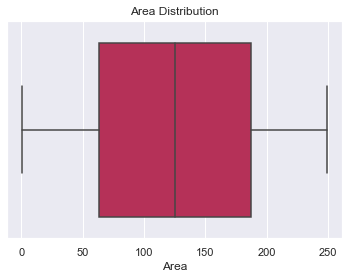

In [24]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.boxplot(x="Area", data=df, palette="rocket")
plt.title("Area Distribution")

In [31]:
df.Area.min(),df.Area.max()

(1, 249)

**Prices Column**

Text(0.5, 1.0, 'Prices Distribution')

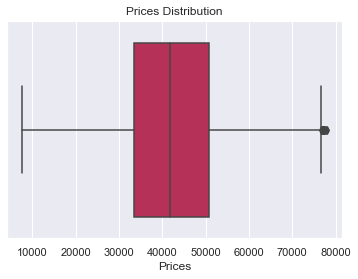

In [32]:
sns.set_theme(style="darkgrid")
sns.boxplot(x="Prices", data=df, palette="rocket")
plt.title("Prices Distribution")

In [33]:
df.Prices.min(),df.Prices.max()

(7725, 77975)

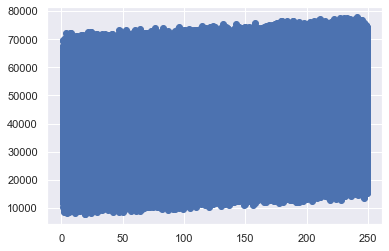

In [34]:
plt.scatter(df.Area, df.Prices)
plt.show()

In [38]:
X = df['Area'].head(1000)
Y = df['Prices'].head(1000)
#print(X)
#print(Y)

# Implement linear regression using OLS method

In [40]:
x_bar = X.sum()/X.count()
y_bar = Y.sum()/Y.count()
print(x_bar,y_bar)

125.694 42074.3


In [44]:
#n = ((X-x_bar) * (Y-y_bar))
#print(n)
n = ((X-x_bar) * (Y-y_bar)).sum()
d = ((X-x_bar)**2).sum()
m = n/d
b = y_bar - m* x_bar
print(m, b)

33.97454508484849 37803.90353010506


In [49]:
predicted_df = pd.DataFrame(data = range(0,int(X.max())), columns={'X'})

#print(predicted_df)
#print(predicted_df['X'])
#this above two statement print the same result because the predicted_df['Y'] is not added

predicted_df['Y'] = predicted_df.X*m + (b)

#print(predicted_df)
#print(predicted_df['Y'])

In [55]:
x = predicted_df['X']
y = predicted_df['Y']
#print(x,y)

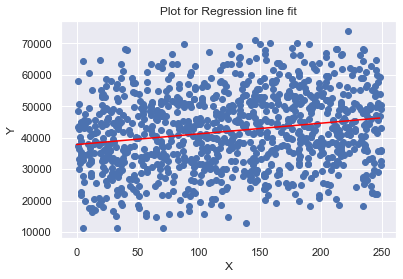

In [57]:
plt.plot(x,y,c='red')
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot for Regression line fit')
#plt.legend()
plt.show()

# Implement linear regression using Gradient Descent from scratch

In [58]:
m = 0
c = 0

L      = 0.00001  # The learning Rate
epochs = 2500  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
print (m, c)

258.428635231804 460.89669909759397


In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Y_pred = m*X + c
print("RMSE: ", sqrt(mean_squared_error(Y,Y_pred)),"R2 score", r2_score(Y,Y_pred))

RMSE:  22067.243163314433 R2 score -2.2059483088350245


#  Implement linear regression using sklearn API

In [60]:
from sklearn import linear_model
# This is using SKlearn API
X = pd.DataFrame(df.Area)
Y = df.Prices

# Create object of algorithm
rg = linear_model.LinearRegression()
# Create model by fitting data
rg.fit(X, Y)

# RMSE and R2 Score
print("RMSE: ", sqrt(mean_squared_error(Y,rg.predict(X))), "R2 Score:", r2_score(Y,rg.predict(X)))

RMSE:  11977.372439015693 R2 Score: 0.0218202278606604


**Quantify goodness of your model and discuss steps taken for improvement (RMSE, MSE, R2Score).**

Regression using SKlearn Api is good as it gives highest R2 score and low RMSE.

**Discuss comparison of different methods.**

The main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases.

The formula which you wrote looks very simple, even computationally, because it only works for univariate case, i.e. when you have only one variable. In the multivariate case, when you have many variables, the formulae is slightly more complicated on paper and requires much more calculations when you implement it in software:
β=(X′X)−1X′Y
Here, you need to calculate the matrix X′X then invert it (see note below). It's an expensive calculation. For your reference, the (design) matrix X has K+1 columns where K is the number of predictors and N rows of observations. In a machine learning algorithm you can end up with K>1000 and N>1,000,000. The X′X matrix itself takes a little while to calculate, then you have to invert K×K matrix - this is expensive.

So, the gradient descent allows to save a lot of time on calculations. Moreover, the way it's done allows for a trivial parallelization, i.e. distributing the calculations across multiple processors or machines. The linear algebra solution can also be parallelized but it's more complicated and still expensive.

Additionally, there are versions of gradient descent when you keep only a piece of your data in memory, lowering the requirements for computer memory. Overall, for extra large problems it's more efficient than linear algebra solution.

This becomes even more important as the dimensionality increases, when you have thousands of variables like in machine learning.

In data analysis, we use OLS for estimating the unknown parameters in a linear regression model. The goal is minimizing the differences between the collected observations in some arbitrary dataset and the responses predicted by the linear approximation of the data. We can express the estimator by a simple formula. You can find the general OLS formula and its exact mathematical derivation.